# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
env = gym.make('Pendulum-v0')

random_seed = 10
env.seed(random_seed)

# from agent import Agent
# agent = Agent(state_size=env.observation_space.shape[0], action_size=env.action_space.shape[0], 
#               random_seed=random_seed)

/home/arasdar/anaconda3/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


[10]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
env.action_space, env.observation_space

(Box(1,), Box(3,))

In [4]:
action_size = env.action_space.shape[0]
state_size = env.observation_space.shape[0]

In [5]:
action_size, state_size

(1, 3)

In [6]:
env.observation_space.low, env.observation_space.high

(array([-1., -1., -8.], dtype=float32), array([1., 1., 8.], dtype=float32))

In [7]:
env.action_space.low, env.action_space.high

(array([-2.], dtype=float32), array([2.], dtype=float32))

### 3. Instantiate DDPG Agent

In [8]:
from agent import Agent

agent = Agent(s_size=state_size, a_size=action_size, random_seed=random_seed)

### 4. Train the Agent with DDPG

In [9]:
from collections import deque
import numpy as np
import time
import torch

n_episodes=2000
# n_steps=1000
# n_learn=10
# learn_every=20
R_goal=-1000 # TOCHECK
Rs_deque = deque(maxlen=100)
meanRs = [] # plot

In [10]:
for i_episode in range(n_episodes):
    
    # # Reset Env
    # env_info = env.reset(train_mode=train_mode)[brain_name]       # reset the environment    
    # S = env_info.vector_observations                   # get the current state (for each agent)
    s = env.reset() # s: state
    #print(s.shape)

    #Rs = np.zeros(num_agents)                            # initialize the score (for each agent)
    R = 0 # R: total reward

    #for i_step in range(n_steps):
    while True:
        
        a = agent.act(np.reshape(s, [1, -1])) # a=[-2, 2]
        a *= 2
        #print(a.shape)
        
        # Exploration noise
        # noise = np.random.normal(loc=0, scale=0.1, size=[num_agents, action_size])
        # A += noise
        # A = np.clip(a=A, a_min=-1, a_max=1)

        # env_info = env.step(A)[brain_name]            # send all actions to the environment
        # S2 = env_info.vector_observations          # get next state (for each agent)
        # rewards = env_info.rewards                          # get reward (for each agent)
        # dones = env_info.local_done                         # see if episode finished
        #s2: next_state, r: reward, done/terminal, env: environment
        s2, r, done, _ = env.step(np.reshape(a, [-1]))
        #print(s2.shape, r, done)


        # for s, a, reward, s2, done in zip(S, A, rewards, S2, dones):
        # agent.step(state, action, reward, next_state, done) # send actions to the agent
        agent.step(s, a, r, s2, done)

        R += r                           # update the score (for each agent)
        s = s2                                # roll over states to next time step

        # if i_step%learn_every == 0:
        #     for _ in range(n_learn):
        #         agent.start_learn()
        #print(len(agent.memory))
        agent.start_learn()

        # if np.any(dones):                                   # exit loop if episode finished
        #     break
        if done:
            break

    #meanR = np.mean(Rs)
    #Rs_deque.append(meanR)
    Rs_deque.append(R)
    meanR_deque = np.mean(Rs_deque) # print
    meanRs.append(meanR_deque) # plot

    print('\rEpisode {}\tTotal Average Score: {:.2f}'.format(i_episode+1, meanR_deque))  
    if meanR_deque >= R_goal:
        torch.save(agent.g.state_dict(), 'g-pendulum.pth') # pendulum
        torch.save(agent.d.state_dict(), 'd-pendulum.pth') # pendulum
        break

Episode 1	Total Average Score: -877.26
Episode 2	Total Average Score: -1364.23
Episode 3	Total Average Score: -1152.01
Episode 4	Total Average Score: -1080.46
Episode 5	Total Average Score: -1179.40
Episode 6	Total Average Score: -1235.93
Episode 7	Total Average Score: -1274.44
Episode 8	Total Average Score: -1295.80
Episode 9	Total Average Score: -1312.86
Episode 10	Total Average Score: -1315.90
Episode 11	Total Average Score: -1281.09
Episode 12	Total Average Score: -1266.63
Episode 13	Total Average Score: -1265.32
Episode 14	Total Average Score: -1283.98
Episode 15	Total Average Score: -1223.66
Episode 16	Total Average Score: -1155.41
Episode 17	Total Average Score: -1094.25
Episode 18	Total Average Score: -1070.16
Episode 19	Total Average Score: -1045.57
Episode 20	Total Average Score: -1031.88
Episode 21	Total Average Score: -999.08
Episode 22	Total Average Score: -975.65
Episode 23	Total Average Score: -944.32
Episode 24	Total Average Score: -915.32
Episode 25	Total Average Score

Episode 202	Total Average Score: -1313.72
Episode 203	Total Average Score: -1314.89
Episode 204	Total Average Score: -1316.83
Episode 205	Total Average Score: -1318.69
Episode 206	Total Average Score: -1327.43
Episode 207	Total Average Score: -1331.84
Episode 208	Total Average Score: -1332.77
Episode 209	Total Average Score: -1338.01
Episode 210	Total Average Score: -1342.26
Episode 211	Total Average Score: -1347.46
Episode 212	Total Average Score: -1348.85
Episode 213	Total Average Score: -1349.43
Episode 214	Total Average Score: -1354.71
Episode 215	Total Average Score: -1358.51
Episode 216	Total Average Score: -1357.44
Episode 217	Total Average Score: -1356.98
Episode 218	Total Average Score: -1373.48
Episode 219	Total Average Score: -1373.84
Episode 220	Total Average Score: -1376.14
Episode 221	Total Average Score: -1376.18
Episode 222	Total Average Score: -1377.53
Episode 223	Total Average Score: -1378.81
Episode 224	Total Average Score: -1378.92
Episode 225	Total Average Score: -

Episode 398	Total Average Score: -1562.18
Episode 399	Total Average Score: -1567.15
Episode 400	Total Average Score: -1567.06
Episode 401	Total Average Score: -1566.65
Episode 402	Total Average Score: -1566.79
Episode 403	Total Average Score: -1568.00
Episode 404	Total Average Score: -1569.47
Episode 405	Total Average Score: -1569.60
Episode 406	Total Average Score: -1570.57
Episode 407	Total Average Score: -1570.41
Episode 408	Total Average Score: -1570.46
Episode 409	Total Average Score: -1569.64
Episode 410	Total Average Score: -1569.95
Episode 411	Total Average Score: -1568.51
Episode 412	Total Average Score: -1568.49
Episode 413	Total Average Score: -1567.94
Episode 414	Total Average Score: -1568.51
Episode 415	Total Average Score: -1567.68
Episode 416	Total Average Score: -1566.77
Episode 417	Total Average Score: -1580.45
Episode 418	Total Average Score: -1581.53
Episode 419	Total Average Score: -1581.11
Episode 420	Total Average Score: -1580.43
Episode 421	Total Average Score: -

Episode 594	Total Average Score: -1586.50
Episode 595	Total Average Score: -1586.45
Episode 596	Total Average Score: -1585.99
Episode 597	Total Average Score: -1586.49
Episode 598	Total Average Score: -1585.80
Episode 599	Total Average Score: -1586.02
Episode 600	Total Average Score: -1586.13
Episode 601	Total Average Score: -1579.16
Episode 602	Total Average Score: -1577.90
Episode 603	Total Average Score: -1584.43
Episode 604	Total Average Score: -1584.72
Episode 605	Total Average Score: -1585.48
Episode 606	Total Average Score: -1585.78
Episode 607	Total Average Score: -1584.75
Episode 608	Total Average Score: -1585.50
Episode 609	Total Average Score: -1584.09
Episode 610	Total Average Score: -1584.45
Episode 611	Total Average Score: -1584.22
Episode 612	Total Average Score: -1585.22
Episode 613	Total Average Score: -1577.10
Episode 614	Total Average Score: -1577.26
Episode 615	Total Average Score: -1578.18
Episode 616	Total Average Score: -1578.19
Episode 617	Total Average Score: -

Episode 790	Total Average Score: -1615.13
Episode 791	Total Average Score: -1615.44
Episode 792	Total Average Score: -1615.27
Episode 793	Total Average Score: -1614.66
Episode 794	Total Average Score: -1615.00
Episode 795	Total Average Score: -1614.63
Episode 796	Total Average Score: -1614.68
Episode 797	Total Average Score: -1615.88
Episode 798	Total Average Score: -1615.75
Episode 799	Total Average Score: -1615.92
Episode 800	Total Average Score: -1615.84
Episode 801	Total Average Score: -1616.00
Episode 802	Total Average Score: -1615.79
Episode 803	Total Average Score: -1615.80
Episode 804	Total Average Score: -1615.46
Episode 805	Total Average Score: -1615.47
Episode 806	Total Average Score: -1615.11
Episode 807	Total Average Score: -1615.68
Episode 808	Total Average Score: -1615.33
Episode 809	Total Average Score: -1615.47
Episode 810	Total Average Score: -1616.10
Episode 811	Total Average Score: -1616.23
Episode 812	Total Average Score: -1615.59
Episode 813	Total Average Score: -

Episode 986	Total Average Score: -1601.51
Episode 987	Total Average Score: -1600.29
Episode 988	Total Average Score: -1599.78
Episode 989	Total Average Score: -1599.64
Episode 990	Total Average Score: -1599.80
Episode 991	Total Average Score: -1600.73
Episode 992	Total Average Score: -1601.34
Episode 993	Total Average Score: -1601.83
Episode 994	Total Average Score: -1601.25
Episode 995	Total Average Score: -1600.47
Episode 996	Total Average Score: -1600.64
Episode 997	Total Average Score: -1600.57
Episode 998	Total Average Score: -1600.06
Episode 999	Total Average Score: -1600.08
Episode 1000	Total Average Score: -1600.25
Episode 1001	Total Average Score: -1599.41
Episode 1002	Total Average Score: -1599.01
Episode 1003	Total Average Score: -1599.62
Episode 1004	Total Average Score: -1599.22
Episode 1005	Total Average Score: -1600.34
Episode 1006	Total Average Score: -1600.73
Episode 1007	Total Average Score: -1602.05
Episode 1008	Total Average Score: -1601.61
Episode 1009	Total Averag

Episode 1177	Total Average Score: -1467.56
Episode 1178	Total Average Score: -1463.64
Episode 1179	Total Average Score: -1464.27
Episode 1180	Total Average Score: -1461.32
Episode 1181	Total Average Score: -1458.70
Episode 1182	Total Average Score: -1457.95
Episode 1183	Total Average Score: -1454.87
Episode 1184	Total Average Score: -1453.38
Episode 1185	Total Average Score: -1450.44
Episode 1186	Total Average Score: -1449.97
Episode 1187	Total Average Score: -1452.57
Episode 1188	Total Average Score: -1451.97
Episode 1189	Total Average Score: -1449.99
Episode 1190	Total Average Score: -1451.22
Episode 1191	Total Average Score: -1452.06
Episode 1192	Total Average Score: -1451.30
Episode 1193	Total Average Score: -1448.98
Episode 1194	Total Average Score: -1449.04
Episode 1195	Total Average Score: -1450.63
Episode 1196	Total Average Score: -1448.50
Episode 1197	Total Average Score: -1444.27
Episode 1198	Total Average Score: -1444.94
Episode 1199	Total Average Score: -1444.48
Episode 120

Episode 1368	Total Average Score: -1226.50
Episode 1369	Total Average Score: -1227.50
Episode 1370	Total Average Score: -1227.87
Episode 1371	Total Average Score: -1226.83
Episode 1372	Total Average Score: -1225.75
Episode 1373	Total Average Score: -1225.83
Episode 1374	Total Average Score: -1226.68
Episode 1375	Total Average Score: -1226.81
Episode 1376	Total Average Score: -1225.36
Episode 1377	Total Average Score: -1225.35
Episode 1378	Total Average Score: -1225.83
Episode 1379	Total Average Score: -1224.32
Episode 1380	Total Average Score: -1221.82
Episode 1381	Total Average Score: -1220.05
Episode 1382	Total Average Score: -1218.67
Episode 1383	Total Average Score: -1215.66
Episode 1384	Total Average Score: -1212.90
Episode 1385	Total Average Score: -1211.23
Episode 1386	Total Average Score: -1208.02
Episode 1387	Total Average Score: -1204.00
Episode 1388	Total Average Score: -1201.54
Episode 1389	Total Average Score: -1200.31
Episode 1390	Total Average Score: -1197.36
Episode 139

Episode 1559	Total Average Score: -1181.47
Episode 1560	Total Average Score: -1181.86
Episode 1561	Total Average Score: -1182.77
Episode 1562	Total Average Score: -1183.47
Episode 1563	Total Average Score: -1184.48
Episode 1564	Total Average Score: -1188.16
Episode 1565	Total Average Score: -1187.28
Episode 1566	Total Average Score: -1187.19
Episode 1567	Total Average Score: -1189.98
Episode 1568	Total Average Score: -1192.96
Episode 1569	Total Average Score: -1192.12
Episode 1570	Total Average Score: -1190.85
Episode 1571	Total Average Score: -1193.16
Episode 1572	Total Average Score: -1193.52
Episode 1573	Total Average Score: -1194.81
Episode 1574	Total Average Score: -1195.91
Episode 1575	Total Average Score: -1192.27
Episode 1576	Total Average Score: -1192.83
Episode 1577	Total Average Score: -1194.26
Episode 1578	Total Average Score: -1195.01
Episode 1579	Total Average Score: -1192.29
Episode 1580	Total Average Score: -1188.95
Episode 1581	Total Average Score: -1189.05
Episode 158

Episode 1750	Total Average Score: -1334.21
Episode 1751	Total Average Score: -1334.25
Episode 1752	Total Average Score: -1335.48
Episode 1753	Total Average Score: -1335.85
Episode 1754	Total Average Score: -1336.51
Episode 1755	Total Average Score: -1338.20
Episode 1756	Total Average Score: -1337.86
Episode 1757	Total Average Score: -1337.89
Episode 1758	Total Average Score: -1337.65
Episode 1759	Total Average Score: -1337.50
Episode 1760	Total Average Score: -1337.19
Episode 1761	Total Average Score: -1336.74
Episode 1762	Total Average Score: -1336.53
Episode 1763	Total Average Score: -1338.31
Episode 1764	Total Average Score: -1338.96
Episode 1765	Total Average Score: -1338.63
Episode 1766	Total Average Score: -1338.77
Episode 1767	Total Average Score: -1338.55
Episode 1768	Total Average Score: -1337.68
Episode 1769	Total Average Score: -1337.44
Episode 1770	Total Average Score: -1337.27
Episode 1771	Total Average Score: -1337.73
Episode 1772	Total Average Score: -1334.75
Episode 177

Episode 1941	Total Average Score: -1314.45
Episode 1942	Total Average Score: -1313.91
Episode 1943	Total Average Score: -1315.95
Episode 1944	Total Average Score: -1314.23
Episode 1945	Total Average Score: -1311.68
Episode 1946	Total Average Score: -1314.66
Episode 1947	Total Average Score: -1312.06
Episode 1948	Total Average Score: -1310.90
Episode 1949	Total Average Score: -1311.26
Episode 1950	Total Average Score: -1311.84
Episode 1951	Total Average Score: -1307.96
Episode 1952	Total Average Score: -1308.47
Episode 1953	Total Average Score: -1304.44
Episode 1954	Total Average Score: -1301.54
Episode 1955	Total Average Score: -1299.01
Episode 1956	Total Average Score: -1298.90
Episode 1957	Total Average Score: -1297.73
Episode 1958	Total Average Score: -1295.78
Episode 1959	Total Average Score: -1298.72
Episode 1960	Total Average Score: -1301.06
Episode 1961	Total Average Score: -1303.54
Episode 1962	Total Average Score: -1301.64
Episode 1963	Total Average Score: -1305.05
Episode 196

### 5. Plot the result

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

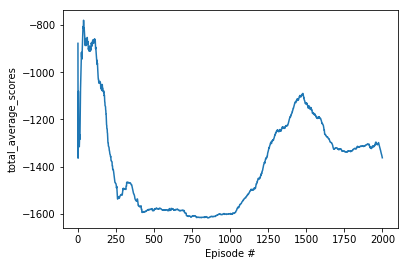

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

plt.plot(np.arange(1, len(meanRs)+1), meanRs)
plt.ylabel('total_average_scores')
plt.xlabel('Episode #')
plt.show()

### 6. Watch the agent running with saved weights

In [14]:
# Load the saved weights into Pytorch model
agent.g.load_state_dict(torch.load('g-pendulum.pth', map_location='cpu'))
agent.d.load_state_dict(torch.load('d-pendulum.pth', map_location='cpu'))

# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# S = env_info.vector_observations                  # get the current states (S) (for each agent)
s = env.reset() # s: state # get the current state (s) (for an agent)

#Rs = np.zeros(num_agents)                          # initialize the total scores (Rs) (for each agent)
R = 0 # R:total reward # initialize the total score (R) (for an agent)

while True:
    #A = agent.act(S)                        # select actions (A) from loaded model agents
    a = agent.act(np.reshape(s, [1, -1])) # a: [-1, +1]    # select action (a) from loaded model agent
    
    # env_info = env.step(A)[brain_name]           # send all actions (A) to tne environment (env)
    # S2 = env_info.vector_observations         # get next states (S2) (for each agent)
    # rewards = env_info.rewards                         # get rewards (for each agent)
    # dones = env_info.local_done                        # see if the episode is done/finished (terminal)
    s2, r, done, _ = env.step(np.reshape(a, [-1]))
    
    # Rs += env_info.rewards                         # update the total scores (Rs) (for each agent)
    # S = S2                               # roll over current states (S) to next states (S2)
    R += r # update the total score (R) (for an agent)
    s = s2 # roll over current state (s) to next state (s2)
    
    #if np.any(dones):                                  # exit loop if episode is done/finished
    if done: # exit loop if episode is done/finished (terminal)
        break
        
print('Average of total scores: {}'.format(R))

FileNotFoundError: [Errno 2] No such file or directory: 'g-pendulum.pth'

When finished, you can close the environment.

In [6]:
env.close()